# Вспомогательный код

In [62]:
import random
import numpy as np


def set_seed():
    random.seed(42)
    np.random.seed(42)

# Задание 1. Множественная линейная регрессия

Почти все проблемы реального мира, с которыми вы столкнетесь, будут описываться более чем двумя переменными. Линейная регрессия с участием нескольких переменных называется **«множественной линейной регрессией» (Multiple Linear Regression)**.

Уравнение множественной линейной регрессии имеет вид:

$y = b_0 + b_1 * x_1 + b_2 * x_2 + ... + b_n * x_n$

Отличие между простой и множественной линейной регрессией заключается в том, что в случае множественной линейной регрессии вместо линии регрессии используется гиперплоскость.

В этом задании мы будем использовать множественную линейную регрессию для прогнозирования потребления бензина (в миллионах галлонов) в 48 штатах США на основе: налогов на бензин (в центах), дохода на душу населения (в долларах), длины шоссе с твердым покрытием (в милях) и доли населения, имеющего водительские права.

Задание:

1. Разделить датасет на тренировочную и тестовую части в соотношении 4 к 1 (`random_state=42`)
1. Провести нормализацию/стандартизацию данных одним из рассмотренных на лекции способов
1. Реализовать множественную линейную регрессию с помощью Sklearn
1. Обучить модель
1. Вывести сравнительную таблицу `y_test` и `y_pred`
1. Вывести параметры качества модели:
  - Mean Absolute Error
  - Mean Squared Error
  - Root Mean Squared Error

Импорт необходимых библиотек:

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Загрузка датасета:

In [64]:
!wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/petrol_consumption.csv

`!wget` доступен в Colab, но недоступен через локальный Jupyter.

В локальном случае требуется скачать [датасет 🛠️[doc]](https://www.kaggle.com/code/kerneler/starter-petrol-consumption-2d0bf1e7-0/input) `petrol_consumption.csv` самостоятельно.

In [65]:
dataset = pd.read_csv("/content/petrol_consumption.csv")
print(dataset.shape)
dataset.head()

(48, 5)


,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [66]:
dataset.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [67]:
x = dataset[
    ["Petrol_tax", "Average_income", "Paved_Highways", "Population_Driver_licence(%)"]
]
y = dataset["Petrol_Consumption"]

In [68]:
set_seed()
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [69]:
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.to_frame())
y_test = scaler_y.transform(y_test.to_frame())

In [70]:
# Multiple regression
regressor = LinearRegression(fit_intercept=True)
regressor.fit(x_train,y_train)

LinearRegression()

Посмотрите на веса перед признаками:

In [71]:
# Print table
coeff_df = pd.DataFrame(regressor.coef_[0], x.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Petrol_tax,-0.313058
Average_income,-0.287764
Paved_Highways,-0.137362
Population_Driver_licence(%),0.656395


Как вы думаете: какой признак является наиболее важным? Какой наименее?

**Напишите вывод:**

Данные нормализованы, поэтому по абсолютному значению коэффициентов мы можем определить важность признаков. Наиболее важный - Population_Driver_licence(%), наименее - Paved_Highways

In [72]:
y_pred = regressor.predict(x_test)

In [73]:
y_test.shape

(10, 1)

In [74]:
y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform(y_pred).ravel()
df = pd.DataFrame({"Real": y_test, "Predicted": y_pred, "Delta": (y_test - y_pred)})

Посмотрите на остатки:

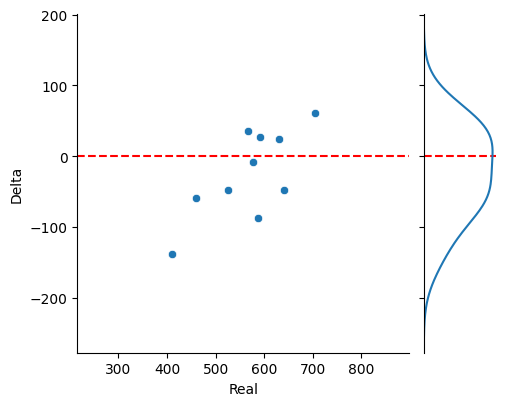

In [86]:
import seaborn as sns
from matplotlib.pyplot import figure

# figure(figsize=(6, 4))
# sns.residplot(x="Real", y="Delta", data=df)
# plt.show()

def plot_joint_grid(df,x_col='Real',y_col='Delta'):
  g = sns.JointGrid(
          data=df,
          x=x_col,
          y=y_col,
          height=5,
          ratio=4,
      )
  g.refline(y=0, color="red")
  g.plot_joint(sns.scatterplot)
  g.plot_marginals(sns.kdeplot)
  g.ax_marg_x.remove()

plot_joint_grid(df)

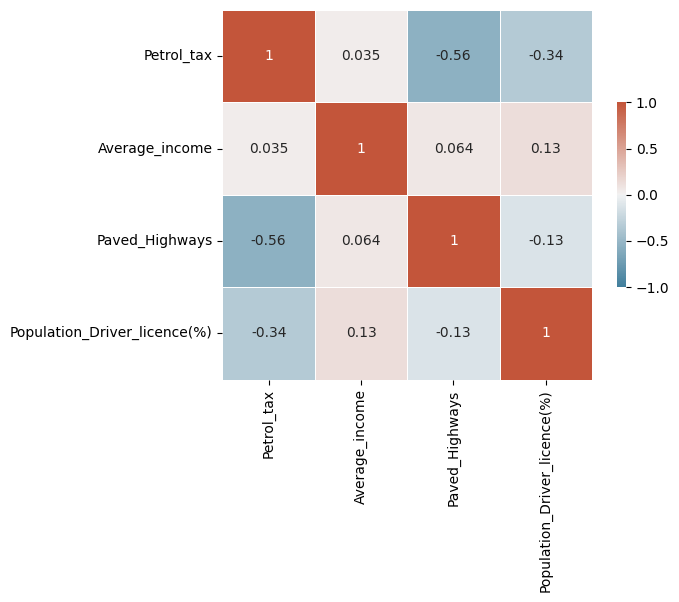

In [81]:
train_norm_df = pd.DataFrame(x_train,columns = list(dataset.columns)[:-1])
corr_mat = train_norm_df.corr()

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_mat,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)
plt.show()

Как вы думаете, можно ли решать эту задачу, используя линейную регрессию?

**Напишите вывод:**

Остатки распределены не совсем случайно, а скорее всего вдоль прямой (хоть и по 10 точкам как-то странно судить, но всё же) + есть (средне) коррелирующие признаки (petrol_tax и paved highways).

Попробуем убрать petrol_tax

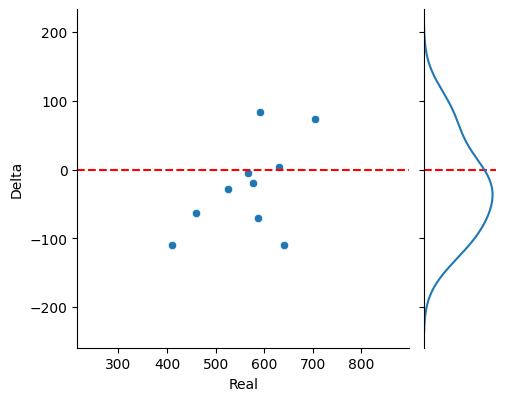

In [90]:
x_train_without_petrol = x_train[:,1:]
x_test_without_petrol = x_test[:,1:]
regressor_without_petrol = LinearRegression(fit_intercept=True)
regressor_without_petrol.fit(x_train_without_petrol,y_train)
y_pred_without_petrol = scaler_y.inverse_transform(regressor_without_petrol.predict(x_test_without_petrol)).ravel()

df_without_petrol = pd.DataFrame({"Real": y_test, "Predicted": y_pred_without_petrol, "Delta": (y_test - y_pred_without_petrol)})

plot_joint_grid(df_without_petrol)

Картина явно не улучшилась. Попробуем ридж регрессию:

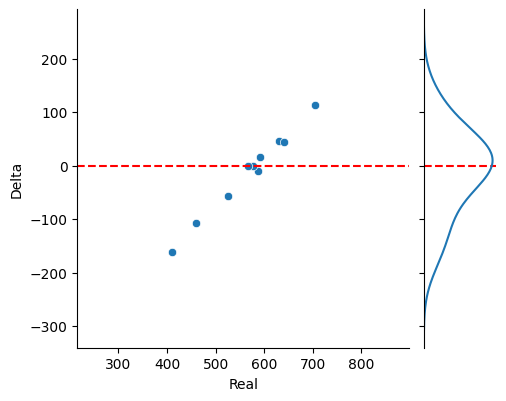

In [97]:
from sklearn.linear_model import Ridge, Lasso

ridge_reg = Ridge(alpha = 200)
ridge_reg.fit(x_train,y_train)

y_pred_ridge =scaler_y.inverse_transform(ridge_reg.predict(x_test).reshape(-1, 1)).ravel()

df_ridge = pd.DataFrame({"Real": y_test, "Predicted": y_pred_ridge, "Delta": (y_test - y_pred_ridge)})

plot_joint_grid(df_ridge)


При применении Ridge регрессии остатки четко дают прямую линию. Значит, в этой задаче линейная регрессия **не применима**.

In [98]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 53.47
Mean Squared Error (MSE): 4083.26
Root Mean Squared Error (RMSE): 63.90


## Формат результата

Метрики качества:

* Mean Absolute Error ~ 53
* Mean Squared Error: ~ 4083
* Root Mean Squared Error: ~ 64

Выводы о важности признаков и правильности спецификации задачи.


# Задание 2. Kernel SVM

В этом задании вы будете применять обобщенную линейную модель Kernel SVM для решения нелинейной задачи.

Для этого задания мы сгенерируем датасет, представляющий собой **две закрученные спирали**, относящиеся к разным классам. Для этого воспользуемся [кодом ✏️[blog]](https://glowingpython.blogspot.com/2017/04/solving-two-spirals-problem-with-keras.html). Такие данные могут вызвать проблемы не только у линейной модели, но и у маленькой нейронной сети.

Импорт необходимых библиотек:

In [128]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV,RandomizedSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap

Генерация датасета:

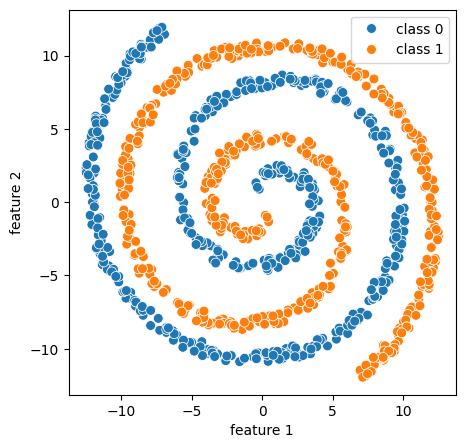

In [100]:
set_seed()


def twospirals(n_points, noise=0.8):
    """
    Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points, 1)) * 780 * (2 * np.pi) / 360
    d1x = -np.cos(n) * n + np.random.rand(n_points, 1) * noise
    d1y = np.sin(n) * n + np.random.rand(n_points, 1) * noise
    return (
        np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y)))),
        np.hstack((np.zeros(n_points), np.ones(n_points))),
    )


x, y = twospirals(500)
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, s=50, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, ["class 0", "class 1"])
ax.set(xlabel="feature 1", ylabel="feature 2")
plt.show()

Разделите датасет на **тренировочную и тестовую части** в соотношении 4 к 1 (`random_state=42`):

In [104]:
set_seed()
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42,stratify = y
)

**Нормализуйте признаки** (подсказка: не “подглядывайте” в test):


In [105]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Попробуйте применить различные ядра для `svm.SVC`. Постройте **разделяющие кривые для train** части датасета. Посчитайте значения метрики **accuracy для test** части датасета.

In [136]:
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay


def plot_svm(x, y, clf):
    dull_cmap = ListedColormap(["#B8E1EC", "#FEE7D0"])
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))

    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        x,
        response_method="predict",
        cmap=dull_cmap,
        alpha=0.8,
        xlabel="feature 1",
        ylabel="feature 2",
        ax=ax,
    )

    sns.scatterplot(
        x=x[:, 0],
        y=x[:, 1],
        hue=y,
        s=50,
        ax=ax,
        palette=sns.color_palette(["#2DA9E1", "#F9B041"]),
    )
    plt.show()

def train_and_plot(clf,x_train=x_train,y_train=y_train,
                   x_test=x_test,y_test=y_test,test_plot=True):
  clf.fit(x_train,y_train)
  if test_plot:
    plot_svm(x_test,y_test,clf)
  else:
    plot_svm(x_train,y_train,clf)
  return clf

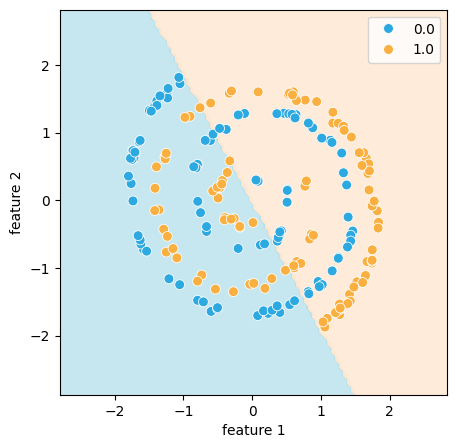

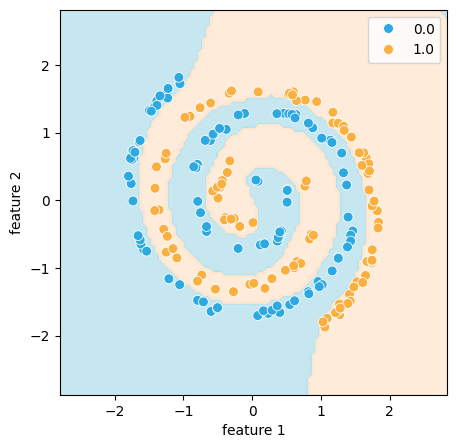

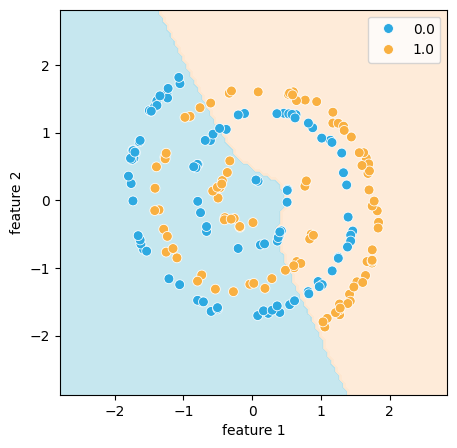

In [124]:
train_and_plot(svm.SVC(kernel='linear', gamma=0.5,degree=2,C=1000))

train_and_plot(svm.SVC(kernel='rbf', gamma=1.05,degree=2,C=1000))

train_and_plot(svm.SVC(kernel='poly', gamma=1.5,degree=3,C=1000))

Ядра со значениями по умолчанию не позволяют качественно разделить классы. Для решения задачи необходимо изменить параметры ядра.

Выберете ядро, которое дает **наилучшее значение accuracy**, ознакомьтесь со **списком настраиваемых параметров** этого ядра в документации `sklearn` [🛠️[doc]](https://scikit-learn.org/stable/modules/svm.html#kernel-functions), **подберите гиперпараметры модели**. Для подбора гиперпараметров модели воспользуйтесь кросс-валидацией.

[[doc] 🛠️ Пример подбора параметров](https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html)

Также можно использовать `GridSearchCV` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) или `RandomizedSearchCV` [🛠️[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html#sklearn.model_selection.RandomizedSearchCV). Используйте разбиение на 4 фолда и `accuracy` в качестве целевой метрики.

**Подсказка:** при очень больших значения обратного коэффициента нормализации модель может плохо сходиться. Ограничьтесь максимальным значением  $10^5$.

*---------------*

По примерам выше уже видно, что радиальное ядро хорошо разделяет данные, поэтому имеет смысл подбирать гиперпараметры для него:

In [130]:

param_dist = {
    'C':[10,30,50,70,100],
    'gamma':np.linspace(0.9,1.1,10),
    'kernel':['rbf']
}


random_search = RandomizedSearchCV(
    estimator=svm.SVC(),
    param_distributions=param_dist,
    n_iter=30,
    cv=4,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1
)

random_search.fit(x_train,y_train)

RandomizedSearchCV(cv=4, estimator=SVC(), n_iter=30, n_jobs=-1,
                   param_distributions={'C': [10, 30, 50, 70, 100],
                                        'gamma': array([0.9       , 0.92222222, 0.94444444, 0.96666667, 0.98888889,
       1.01111111, 1.03333333, 1.05555556, 1.07777778, 1.1       ]),
                                        'kernel': ['rbf']},
                   random_state=42, scoring='accuracy')

Обучите модель с подобранными гиперпараметрами. Постройте разделяющую кривую для train части датасета и значение accuracy для test.

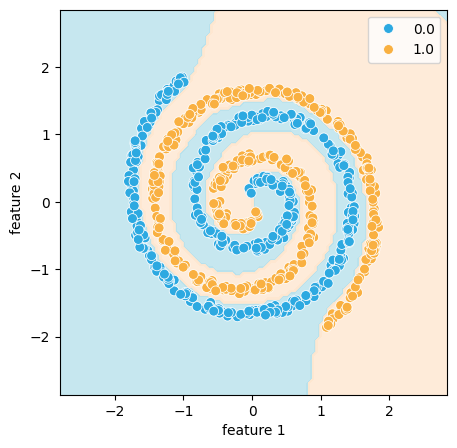

Test accuracy score - 1.0000


In [138]:
best_model = random_search.best_estimator_

best_model_fitted = train_and_plot(best_model,test_plot=False)

y_pred = best_model_fitted.predict(x_test)
print(f'Test accuracy score - {accuracy_score(y_test,y_pred):.4f}')

## Формат результата

* Значение accuracy для test части датасета >0.95
* График разделяющей кривой для train части датасета

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.4/Exercises/EX02/result_2_task_ex02.png" width="500">

# Задание 3. Составные части модели классификатора

В этом задании вам предлагается написать и проверить несколько вспомогательных функций, которые вы будете использовать внутри рукописной модели.

Итоговая модель будет выглядеть так:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.4/Exercises/EX02/linear_model_probability_pipeline.png" width="1000">

В качестве функционала ошибок будет использоваться Cross-Entropy.

**Задание *:** не использовать циклы `for`, `while` и условие `if` внутри функций.

## Формат результата

* Все функции должны быть прописаны, все тесты должны показывать лог: `It's OK`

## Написание функций для модели классификатора



В этой части напишем **линейный слой**, который принимает на вход признаки `x` и веса `w`, возвращает расширенный набор признаков с добавлением столбца единиц `x_ext` (он нужен будет для расчета градиентов), и выход слоя — логиты `s` для различных классов для каждого объекта батча.

**Подсказка:** обратите внимание на размерности матриц и векторов, описанные в [docstring ✏️[blog]](https://www.programiz.com/python-programming/docstrings).


In [139]:
def linear(w, x):
    """
    Calculates logits

    Parameters
    ----------
    w: np.narray
        model weights and bias (parameters) [input_size+1, classes_num]
    x: np.narray
        array of features [batch_size, input_size]

    Returns
    ----------
    x_ext: np.narray
        array of features with ones column [batch_size, input_size+1]
    s: np.narray
        array of logits with size [batch_size, classes_num]
    """
    x_ext = np.hstack([np.ones((x.shape[0], 1)), x])
    s = np.dot(x_ext, w)
    return x_ext, s

Проверим работу:

In [140]:
# tests
# fmt: off
inputs = [
    (
        np.array([[1., 2.,],
                  [3., 4.,],
                  [5., 6.,]]),
        np.array([[1., 2.,],
                  [3., 4.,]])
    ),
    (
        np.array([[1., 1.,],
                  [0., 0.,],
                  [0., 0.,]]),
        np.array([[0., 0.,],
                  [0., 0.,]])
    )
]

outputs = [
    (
        np.array([[1., 1., 2.,],
                  [1., 3., 4.,]]),
        np.array([[14., 18.,],
                  [30., 38.,],]),
    ),
    (
        np.array([[1., 0., 0.,],
                  [1., 0., 0.,]]),
        np.array([[1., 1.,],
                  [1., 1.,]])
    )
]
# fmt: on

for (w, x), (x_out, s_out) in zip(inputs, outputs):
    x, s = linear(w, x)
    assert x.shape == x_out.shape, f"Check shape: {x.shape}!={x_out.shape}"
    assert (np.abs(x - x_out) < 0.00001).all(), f"Check \n{x}\n!=\n{x_out}"
    assert s.shape == s_out.shape, f"Check shape: {s.shape}!={s_out.shape}"
    assert (np.abs(s - s_out) < 0.00001).all(), f"Check \n{s}\n!=\n{s_out}"

print("It's OK")

It's OK


Теперь напишем функцию `soft_max`, преобразовывающую выходы линейного слоя `s` в вероятности `probs`.

**Подсказка**: Используйте `axis=1, keepdims=True` при вычислении максимумов и сумм по строкам. Не забудьте о методе избегания `None` в расчете SoftMax.

In [143]:
def soft_max(s):
    """
    Converts logits to probabilities

    Parameters
    ----------
    s: np.narray
        array of logits [batch_size, classes_num]

    Returns
    ----------
    probs: np.narray
         array of probabilities [batch_size, classes_num]
    """
    exp_logits = np.exp(s - np.max(s, axis=1, keepdims=True))
    probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)
    return probs

Проверим работу:

In [144]:
# tests
# fmt: off
inputs = [
    np.array([[1, 2, 3],
              [6, 5, 4],
              [12, 3, -2]]),
    np.array([[123, 456, 789],
              [-1123, -1456, -1789]]),
]

outputs = [
    np.array([[9.00305732e-02, 2.44728471e-01, 6.65240956e-01],
              [6.65240956e-01, 2.44728471e-01, 9.00305732e-02],
              [9.99875774e-01, 1.23394473e-04, 8.31425422e-07],]),
    np.array([[5.75274406e-290, 2.39848787e-145, 1.00000000e+000],
              [1.00000000e+000, 2.39848787e-145, 5.75274406e-290]])
]
# fmt:on

for s, out in zip(inputs, outputs):
    probs = soft_max(s)
    assert s.shape == out.shape, f"Check shape: {probs.shape}!={out.shape}"
    assert (np.abs(probs - out) < 0.00001).all(), f"Check \n{probs}\n!=\n{out}"

print("It's OK")

It's OK


Функция `y_to_prob` должна преобразовывать истинные метки классов `y_true` в истинные вероятности `probs`.

**Подсказка:** эту функцию не обязательно использовать в итоговой модели или при написании Cross-Entropy loss, но она полезна для понимания происходящего внутри модели.

In [150]:
def y_to_prob(y_true, classes_num):
    """
    Converts class labels to true probabilities

    Parameters
    ----------
    y_true: np.narray
         true class labels [batch_size]
    classes_num: int
        number of classes

    Returns
    ----------
    probs: np.narray
         array of probabilities [batch_size, classes_num]
    """
    probs = np.zeros((y_true.shape[0],classes_num))
    probs[np.arange(y_true.shape[0]), y_true] = 1
    return probs

Проверим работу:

In [151]:
# tests
# fmt: off
inputs = [
    (np.array([1, 2, 3]), 4),
    (np.array([7, 0]), 10),
]

outputs = [
    np.array([[0., 1., 0., 0.,],
              [0., 0., 1., 0.,],
              [0., 0., 0., 1.,],]),
    np.array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,],
              [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,]])
]
# fmt: on

for (y, n), out in zip(inputs, outputs):
    probs = y_to_prob(y, n)
    assert probs.shape == out.shape, f"Check shape: {probs.shape}!={out.shape}"
    assert (np.abs(probs - out) < 0.00001).all(), f"Check \n{probs}\n!=\n{out}"

print("It's OK")

It's OK


Напишем функцию `cross_entropy`, которая возвращает среднюю ошибку на 1 объект из батча.  

**Подсказка:** предусмотрите случай, когда под логарифмом находится нулевое значение.

In [181]:
def cross_entropy(pred_probs, y_true,epsilon=1e-10):
    """
    Calculates loss

    Parameters
    ----------
    pred_probs: np.narray
         array of predicted probabilities [batch_size, classes_num]
    y_true: np.narray
         true class labels [batch_size]

    Returns
    ----------
    loss: float
         loss value per 1 batch item
    """
    pred_probs = np.clip(pred_probs, epsilon, 1. - epsilon)
    true_prob = y_to_prob(y_true,pred_probs.shape[1])
    loss = np.sum(-true_prob*np.log(pred_probs))/pred_probs.shape[0]
    return loss

Проверим работу:

In [184]:
# tests
# fmt: off
inputs = [
    (
        np.array([[1., 0., 0.],
                  [0., 0., 1.],]),
        np.array([0, 2]),
    ),
    (
        np.array([[1., 0., 0.],
                  [0., 0.5, 0.5],]),
        np.array([0, 2]),
    )
]

outputs = [
    0, 0.34657359027997264
]
# fmt: off

for (pred_probs, y_true), out in zip(inputs, outputs):
    loss = cross_entropy(pred_probs, y_true)
    assert (np.abs(loss - out) < 0.00001).all(), f"Check \n{loss}\n!=\n{out}"

print("It's OK")

It's OK


Посчитаем градиент, используя формулы, выведенные в лекции:

$$ \dfrac {\partial L} {\partial s_{y_i}}  =  \begin{cases} p_i - 1 & \text{для i=k, где k - номер истинного класса}, \\p_i & \text{для любого } i\neq k.
 \end{cases} $$

Сhain rule:

$$ \dfrac {\partial L} {\partial w_i}  = \dfrac {\partial L} {\partial s_{y_i}} \dfrac {\partial s_{y_i}} {\partial w_i}  =  \begin{cases}(p_i - 1)x & \text{для i=k, где k - номер истинного класса}, \\p_ix & \text{для любого } i\neq k.
\end{cases} $$

В матричном виде:
$$\dfrac {\partial L} {\partial W}  = X^T (P_\text{pred} - P_\text{true})$$

In [186]:
def grad(x_ext, pred_probs, y_true):
    """
    Calculates gradient

    Parameters
    ----------
    x_ext: np.narray
        array of features with ones column [batch_size, input_size+1]
    pred_probs: np.narray
         array of predicted probabilities [batch_size, classes_num]
    y_true: np.narray
         true class labels [batch_size]

    Returns
    ----------
    dl_dw: np.narray
         array of gradient loss over weights [input_size+1, classes_num]
    """
    true_probs = y_to_prob(y_true,pred_probs.shape[1])
    dl_dw = np.dot(x_ext.T,(pred_probs-true_probs))
    return dl_dw

Проверим работу:

In [187]:
# tests
# fmt: off
inputs = [
    (
        np.array([[1.,  0.1,  0.2,],
                  [1.,  0.3,  0.4,],
                  [1., -0.5, -0.6,]]),
        np.array([[0.1,  0.9,],
                  [0.5,  0.5,],
                  [0.68, 0.32,]]),
        np.array([0, 1, 0,]),
    ),
    (
        np.array([[1., -0.1,],
                  [1.,  0.4,],
                  [1., -0.6,]]),
        np.array([[0.1,  0.1,  0.1, 0.7],
                  [0.3,  0.2,  0.1, 0.4],
                  [0.18, 0.12, 0.2, 0.5]]),
        np.array([0, 1, 3,]),
    )
]

outputs = [
    np.array([[-0.72, 0.72,],
              [0.22, -0.22,],
              [0.212, -0.212,]]),
    np.array([[-0.42, -0.58, 0.4, 0.6],
              [0.102, -0.402, -0.09, 0.39]]),
]
# fmt: on

for (x_ext, pred_probs, y_true), out in zip(inputs, outputs):
    dl_dw = grad(x_ext, pred_probs, y_true)
    assert (np.abs(dl_dw - out) < 0.00001).all(), f"Check \n{dl_dw}\n!=\n{out}"

print("It's OK")

It's OK


In [188]:
def sgd_step(w, dl_dw, lr):
    """
    Stochastic gradient descent

    Parameters
    ----------
    w: np.narray
        model weights and bias (parameters) [input_size+1, classes_num]
    dl_dw: np.narray
         array of gradient loss over weights [input_size+1, classes_num
    lr: float
         learning rate

    Returns
    ----------
    w: np.narray
        new model weights and bias (parameters) [input_size+1, classes_num]
    """
    w = w-lr*dl_dw
    return w

Проверим работу:

In [189]:
# tests
# fmt: off
inputs = [
    (
        np.array([[ 0.1,  -0.4,],
                  [-0.5,  0.5,],
                  [ 1.,   0.32,]]),
        np.array([[0.1,   0.2,],
                  [0.1,  -0.1,],
                  [-0.68, 0.32,]]),
        0.001
    ),
    (
        np.array([[0.1,  0.1,  0.1, -0.7],
                  [0.3,  -0.2,  0.6, 0.4],
                  [0.18, 0.12, 0.2, -0.5]]),
        np.array([[0.3,  0.2,  -0.3, 0.4],
                  [0.3,  0.2,  0.1, 0.4],
                  [0.3,  0.2, -0.1, 0.4]]),
        0.001
    )
]

outputs = [
    np.array([[ 0.0999,  -0.4002,],
              [-0.5001,   0.5001, ],
              [ 1.00068,  0.31968,]]),
    np.array([[ 0.0997,  0.0998,  0.1003, -0.7004],
              [ 0.2997, -0.2002,  0.5999,  0.3996],
              [ 0.1797,  0.1198,  0.2001, -0.5004]]),
]
# fmt: on

for (w, dl_dw, lr), out in zip(inputs, outputs):
    w = sgd_step(w, dl_dw, lr)
    assert (np.abs(w - out) < 0.00001).all(), f"Check \n{dl_dw}\n!=\n{out}"

print("It's OK")

It's OK


# Задание 4. Модель классификатора

В этом задании нужно написать линейный классификатор и обучить его на датасете CIFAR-10.

Импорт необходимых библиотек:

In [190]:
import sys
import random
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from collections import defaultdict
from sklearn.metrics import accuracy_score
from IPython.display import clear_output

Для оценки прогресса обучения мы будем использовать следующий код для визуализации:

In [191]:
class ProgressPlotter:
    def __init__(self) -> None:
        self._history_dict = defaultdict(list)

    def add_scalar(self, tag: str, value) -> None:
        self._history_dict[tag].append(value)

    def display_plot(self) -> None:
        clear_output()
        n_keys = len(self._history_dict)
        fig, axs = plt.subplots(n_keys, 1, figsize=(12, 3 * n_keys))
        for key_idx, key in enumerate(self._history_dict.keys()):
            history_len = len(self._history_dict[key])
            if n_keys == 1:
                ax = axs
            else:
                ax = axs[key_idx]
            ax.plot(self._history_dict[key], color="c", marker="X")
            ax.set_ylabel(key)
            ax.set_xlabel("step")
            ax.set_xticks(np.arange(history_len))
            ax.set_xticklabels(np.arange(history_len))
        fig.tight_layout()
        plt.show()

Вам не обязательно подробно разбираться с этим кодом, но для отладки (чтобы вы могли понять, как он работает, какие переменные в каком формате поступают на вход и т.д.) приводим пример работы:

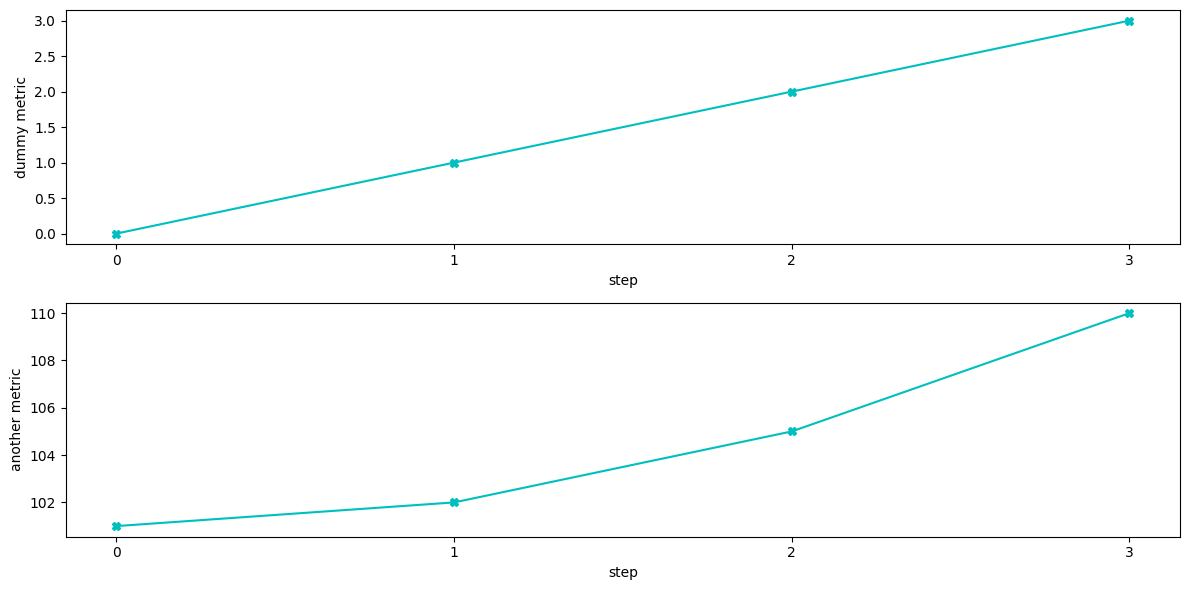

In [218]:
pp = ProgressPlotter()

for i in range(4):
    pp.add_scalar(tag="dummy metric", value=i)
    pp.add_scalar(tag="another metric", value=i**2 + 101)
    pp.display_plot()

## Скачивание датасета CIFAR-10

### Стандартный способ

In [193]:
train_dataset = datasets.CIFAR10("content", train=True, download=True)
test_dataset = datasets.CIFAR10("content", train=False, download=True)

100%|██████████| 170M/170M [00:02<00:00, 76.3MB/s]


Extracting content/cifar-10-python.tar.gz to content
Files already downloaded and verified


In [194]:
x_train = np.array(train_dataset.data)
x_test = np.array(test_dataset.data)

y_train = np.array(train_dataset.targets)
y_test = np.array(test_dataset.targets)

# flatten
x_train = x_train.transpose(0, 3, 1, 2).reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.transpose(0, 3, 1, 2).reshape(x_test.shape[0], -1) / 255.0

labels = [
    "Airplane",
    "Car",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck",
]

# display data(shape [..., 3072])
print("labels: ", labels)
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

labels:  ['Airplane', 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


### Способ через colab

В этом разделе код для скачивания нестандартного датасета, который покажет, как загружать датасеты в colab.


In [195]:
IN_COLAB = "google.colab" in sys.modules
if IN_COLAB:
    !wget -q https://edunet.kea.su/repo/EduNet-web_dependencies/datasets/cifar-10-python.tar.gz
    !tar -xzf cifar-10-python.tar.gz
    !ls -l
    top_path = "/content"
else:
    top_path = ""
    print("You didn't run code in colab")

total 166540
drwxr-xr-x 2 2156 1103      4096 Jun  4  2009 cifar-10-batches-py
-rw-r--r-- 1 root root 170498071 Jul 27  2023 cifar-10-python.tar.gz
drwxr-xr-x 3 root root      4096 Mar  3 12:51 content
-rw-r--r-- 1 root root     15828 Mar  3 11:01 g.png
-rw-r--r-- 1 root root      1389 Jul 27  2023 petrol_consumption.csv
-rw-r--r-- 1 root root      1389 Jul 27  2023 petrol_consumption.csv.1
drwxr-xr-x 1 root root      4096 Feb 27 14:22 sample_data


Распакуем данные:

In [197]:
# Recreating python object from the bytecode of the batches
def unpickle(file, encoding="bytes"):
    import pickle

    with open(file, "rb") as fo:
        dict = pickle.load(fo, encoding=encoding)
    return dict


def load_train_data():
    x_train = []
    y_train = []
    for i in range(1, 6):
        raw = unpickle(f"cifar-10-batches-py/data_batch_{i}")
        x_train.append(raw[b"data"])
        y_train.append(raw[b"labels"])
    x_train = np.vstack(x_train)
    y_train = np.hstack(y_train)
    return x_train / 255.0, y_train


x_train, y_train = load_train_data()

#  Load test data
test = unpickle(top_path + "/cifar-10-batches-py/test_batch")
x_test = np.array(test[b"data"]) / 255.0
y_test = np.array(test[b"labels"])

# Load classes names
meta = unpickle(top_path + "/cifar-10-batches-py/batches.meta", "utf-8")
labels = meta["label_names"]

# Display data(shape [..., 3072])
print("labels: ", labels)
print("Training data shape: ", x_train.shape)
print("Training labels shape: ", y_train.shape)
print("Test data shape: ", x_test.shape)
print("Test labels shape: ", y_test.shape)

labels:  ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
Training data shape:  (50000, 3072)
Training labels shape:  (50000,)
Test data shape:  (10000, 3072)
Test labels shape:  (10000,)


### Локальный способ

Эта инструкция нужна, если вы запускаете блокнот локально:
1. Скачайте архив с датасетом CIFAR-10 с официального
[сайта 🛠️[doc]](https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz). И не удаляйте его в течение курса, он ещё не раз пригодится.
2. Распакуйте архив в папку с заданием.
3. Проверьте, в какой директории запущен блокнот, командой `cd`.
4. Если директория не та, в которой лежат файлы датасета, смените её с помощью `cd C:\some\directory\with\dataset`.
5. Проверьте командой `ls`, видно ли в блокноте файлы датасета.

## Просмотр данных

Отобразим данные графически:

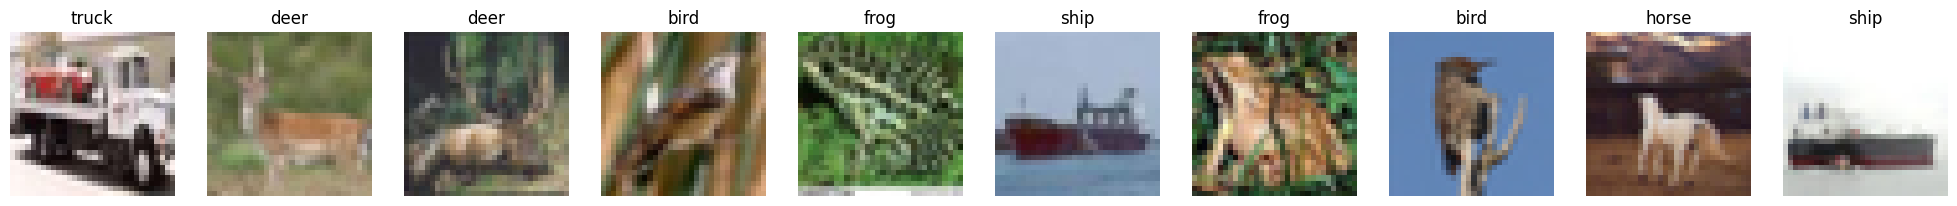

In [198]:
def to_img(arr):
    # Transform data from vector to array with 3 channel(RGB)
    img = (255.0 * arr.reshape(3, 32, 32).transpose(1, 2, 0)).astype(int)
    return img


plt.rcParams["figure.figsize"] = (25, 10)
image_to_display = 10
j = 1
for i in random.sample(range(0, len(x_train)), image_to_display):
    plt.subplot(1, image_to_display, j)
    plt.imshow(to_img(x_train[i]))
    plt.axis("off")
    plt.title(labels[int(y_train[i])])
    j += 1

## Написание модели

В этой части задания нужно написать класс `LinearClassifier`, в котором будет происходить обучение модели. Вам дан шаблон класса, в котором нужно заполнить пробелы в точках `# Your code here`. Используйте функции, написанные и отлаженные в предыдущем задании.

**Подсказка**: Суммируйте `loss` со всех батчей для логирования.

In [219]:
set_seed()

class LinearClassifier:
    def __init__(self, input_size, classes_num, batch_size=256, logger=ProgressPlotter(),epsilon = 1e-10):
        """
        Initialization of parts and hyperparameters of the model

        Parameters
        ----------
        input_size: int
            number of input features
        classes_num: int
            number of classes
        batch_size: int
            number of objects in batch
        """
        # Generate a random weight matrix of small numbers
        # Number of weights changed from input_size to input_size+1 for implement bias trick
        self.w = np.random.randn(input_size + 1, classes_num) * 0.0001
        self.batch_size = batch_size
        self.logger = logger
        self.epsilon = epsilon
        self.classes_num = classes_num


    def forward(self, x, y_true):
        """
        Forward pass of model:
        1. logits calculation ->
        2. probability calculation ->
        3. loss calculation

        Parameters
        ----------
        x: np.narray
            array of input features [batch_size, input_size]
        y_true: np.narray
            true class labels with size [batch_size]

        Save for self.grad function
        ----------
        self.x: np.narray
            array of input features with unit column [batch_size, input_size + 1]
        self.probs: np.narray
            array of predicted probabilities [batch_size, classes_num]
        self.y_true: np.narray
            true class labels with size [batch_size]

        Save for self.predict function
        ----------
        self.s: np.array
            array of logits for all classes with size [batch_size, classes_num]

        Returns
        -------
        loss: float
            sum of loss for objects sum(loss_i)/batch_size
        """
        # Save y_true for self.grad function
        self.y_true = y_true
        self.x = np.hstack([np.ones((x.shape[0], 1)), x])

        # logits calculation
        logits = np.dot(self.x, self.w)

        # SoftMax
        exp_logits = np.exp(logits - np.max(logits, axis=1, keepdims=True))
        self.probs = exp_logits / np.sum(exp_logits, axis=1, keepdims=True)

        # Loss calculation
        pred_probs = np.clip(self.probs, self.epsilon, 1. - self.epsilon)
        self.true_probs = np.zeros((y_true.shape[0],self.classes_num))
        self.true_probs[np.arange(y_true.shape[0]), y_true] = 1
        loss = np.sum(-self.true_probs*np.log(pred_probs))/pred_probs.shape[0]
        return loss

    def grad(self):
        """
        Gradient calculation

        Use
        -------
        self.x: np.narray
            array of input features with unit column [batch_size, input_size + 1]

        self.probs: np.narray
            array of predicted probabilities [batch_size, classes_num]

        self.y_true: np.narray
            true class labels with size [batch_size]

        Save for self.step function
        ----------
        self.dl_dw: np.narray
            derivative of loss by weights
        """
        # Gradient calculation
        self.dl_dw = np.dot(self.x.T,(self.probs-self.true_probs))

    def step(self, lr):
        """
        Gradient descent step

        Parameters
        ----------
        lr: float
            learning rate
        Use
        ----------
        self.w: np.narray
            model weights
        self.dl_dw: np.narray
            derivative of loss by weights
        """
        # Changing new self.w values with using self.dl_dw
        self.w = self.w-lr*self.dl_dw

    def epoch(self, x, y, lr=1e-7, train=True):
        """
        One epoch of model training or validation

        Parameters
        ----------
        x: np.array
            array of input features with size [len_data, input_size]
        y: np.array
            array of true class labels  with size [len_data]
        lr: float
            learning rate
        train: bool
            flag enabling training mode
        """
        len_data = x.shape[0]
        indexes = list(range(len_data))
        if train:
            random.shuffle(indexes)
        loss = 0
        for i in range(0, len_data, self.batch_size):
            # Batch generation
            idx = indexes[i : i + self.batch_size]
            x_batch = x[idx]
            y_batch = y[idx]
            # Run model (use x_batch and y_batch, sum to loss)

            loss += self.forward(x_batch,y_batch)
            if train:
                # Calculate gradient
                self.grad()

                # Gradient descent step
                self.step(lr)

        return loss * self.batch_size / len_data

    def train(self, x_train, y_train, x_test, y_test, lr=5e-5, epochs=5):
        """
        Model training

        Parameters
        ----------
        x_train: np.array
            array of train input features with size [len_train, input_size]
        y_train: np.array
            true class labels [len_train]
        x_test: np.array
            array of test input features with size [len_test, input_size]
        y_test: np.array
            true class labels [len_test]
        lr: float
            learning rate
        epochs: int
            number of training epochs
        """
        for i in range(epochs):
            # Epoch of learning
            loss_train = self.epoch(x_train, y_train, lr)
            loss_test = self.epoch(x_test, y_test, train=False)
            y_pred = self.predict(x_test)
            acc_test = accuracy_score(y_test, y_pred)
            # logging
            self.logger.add_scalar(tag="Train Loss", value=loss_train)
            self.logger.add_scalar(tag="Test Loss", value=loss_test)
            self.logger.add_scalar(tag="Test Accurecy", value=acc_test)
            self.logger.display_plot()
            print(
                f"Epoch = {i+1}, Train Loss = {loss_train:.3f}, "
                f"Test Loss = {loss_test:.3f}, Test acc = {acc_test}"
            )

    def predict(self, x):
        """
        Model predict

        Parameters
        ----------
        x: np.array
            array of input features with size [len_data, input_size]

        Returns
        -------
        y_pred: np.array
            array of predicted lable with size [len_data]
        """
        y_pred = []
        len_data = x.shape[0]
        indexes = list(range(len_data))
        for i in range(0, len_data, self.batch_size):
            # Batch generation
            idx = indexes[i : i + self.batch_size]
            x_batch = x[idx]
            # Prediction
            _, s = linear(self.w, x_batch)
            y_pred.append(np.argmax(s, axis=1))
        return np.concatenate(y_pred, axis=0)

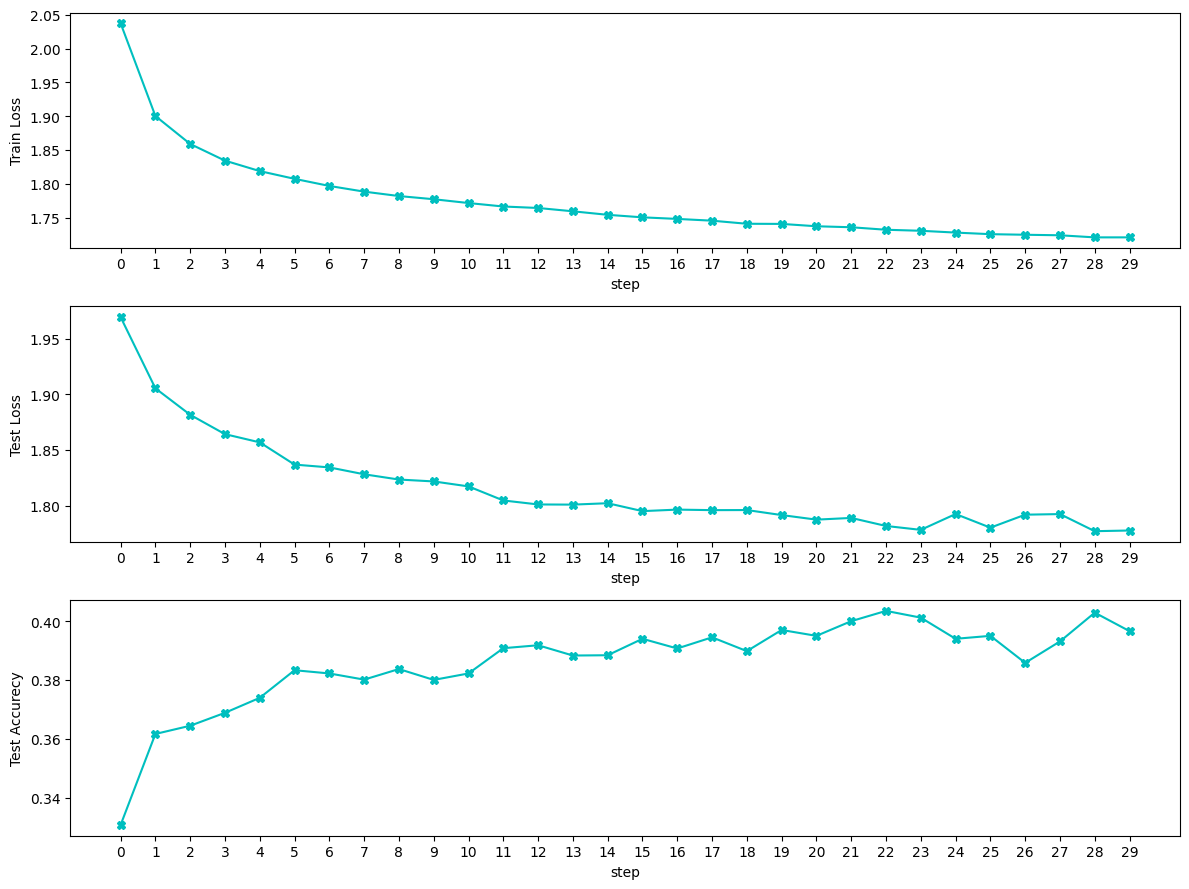

Epoch = 30, Train Loss = 1.721, Test Loss = 1.778, Test acc = 0.3967


In [221]:
pp = ProgressPlotter()
model = LinearClassifier(x_train.shape[1], len(labels),logger = pp)
model.train(x_train, y_train, x_test, y_test,epochs = 30)

**Замечание:** в данном примере мы автоматически отрисовываем график в процессе обучения, используя MatplotLib. В реальности так не делают: частый вызов визуализации замедляет расчет.
В дальнейшем мы будем использовать для визуализации TensorBoard, который отрисовывает графики в процессе обучения по запросу. Альтернативой TensorBoard является вывод значений метрик в процессе обучения (убедиться, что Loss падает), сохранение значений метрик и отрисовка их в конце обучения.


## Формат результата

* Значение accuracy для test части датасета >0.35.
* График кривых обучения.

Пример графика:

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.4/Exercises/EX02/result_4_task_ex02.png" width="500">

# Задание 5. Sklearn-совместимая модель

В этом задании мы наследуемся от написанного нами класса `LinearClassifier` и базовых классов Sklearn, чтобы сделать Sklearn-совместимую модель.

Подсказка: о списке обязательных параметров и атрибутов для `sklearn`-совместимой модели можно почитать тут:
* [[doc] 🛠️ Estimators](https://scikit-learn.org/stable/developers/develop.html#estimators)

Для экономии времени мы будем использовать датасет рукописных цифр MNIST.

Импорт необходимых библиотек:

In [222]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin

Загрузка данных:

In [223]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Посмотрим на данные:

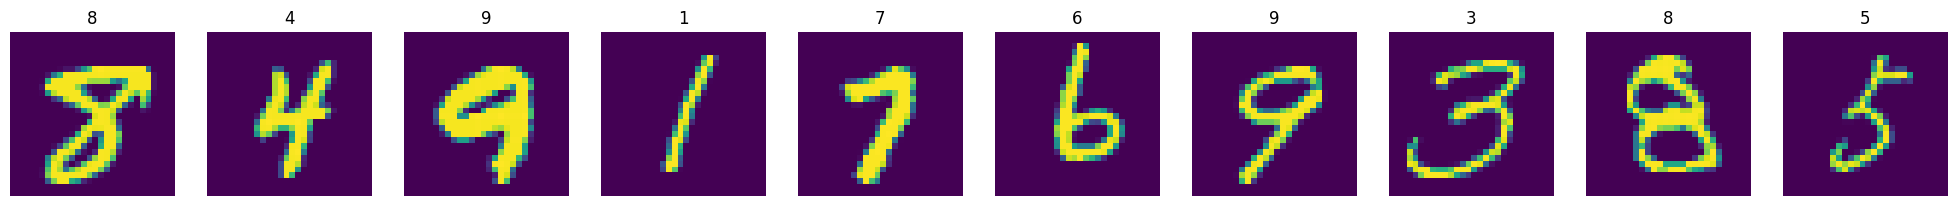

In [224]:
plt.rcParams["figure.figsize"] = (25, 10)
image_to_display = 10
j = 1
for i in random.sample(range(0, len(x_train)), image_to_display):
    plt.subplot(1, image_to_display, j)
    plt.imshow(x_train[i])
    plt.axis("off")
    plt.title(int(y_train[i]))
    j += 1

Вытянем данные в вектор:

In [225]:
# Flatten
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
x_train.shape

(60000, 784)

Напишем класс модели. Наследуемся у:
- [[doc] 🛠️](https://scikit-learn.org/stable/modules/generated/sklearn.base.BaseEstimator.html#sklearn-base-baseestimator) `BaseEstimator` — базовый класс всех estimator в Sklearn.
- [[doc] 🛠️](https://scikit-learn.org/stable/modules/generated/sklearn.base.ClassifierMixin.html#sklearn-base-classifiermixin) `ClassifierMixin` — определяет метод `score` как среднюю accuracy.
- Наш класс `LinearClassifier`.

Метод `predict` уже определен в классе `LinearClassifier`, нам необходимо написать `fit`и объявить нужные параметры.

In [239]:
class SKLinearClassifier(BaseEstimator, ClassifierMixin, LinearClassifier):
    def __init__(
        self,
        input_size=784,
        classes_num=10,
        batch_size=1024,
        lr=2e-7,
        epochs=30,
    ):
        LinearClassifier.__init__(self, input_size, classes_num, batch_size)
        self.epochs=epochs
        self.lr = lr
        self.input_size = input_size
        self.classes_num = classes_num
        self.batch_size = batch_size

    def fit(self, X, y):
      self.train_losses_per_epochs = []
      for i in range(self.epochs):
            loss_train = self.epoch(X, y, self.lr)
            self.train_losses_per_epochs.append(loss_train)
      self.is_fitted_ = True
      return self

Проверим работу модели.

In [240]:
model = SKLinearClassifier()

In [241]:
model.fit(x_train, y_train)

SKLinearClassifier()

In [242]:
y_pred = model.predict(x_test)

In [243]:
df = pd.DataFrame()
df["y_pred"] = y_pred
df["y_true"] = y_test
df.head()

,y_pred,y_true
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4


Посмотрим на качество на кросс-валидации. Для полной совместимости есть проверка `sklearn.utils.estimator_checks.check_estimator`, ее выполнение в этом задании не требуется.

In [244]:
set_seed()
scores = cross_val_score(model, x_train, y_train, n_jobs=-1, cv=4)
print(f"Accuracy: {scores.mean():.3f}, std: {scores.std():.3f}")

Accuracy: 0.865, std: 0.063


## Формат результата

* Значение accuracy на кросс-валидации >0.85
* Модель считывается Sklearn как `Fitted`

<img src ="https://edunet.kea.su/repo/EduNet-web_dependencies/dev-2.4/Exercises/EX02/result_5_task_ex02.png" width="500">